# Tarefa, manipulação de contornos paramétricos

Imagens NIST

## Load database

In [1]:
import sys
sys.path.append('../')
import sarpy.binaryScale 
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import load_nist
from sarpy import extractContours

dataset = load_nist()
%load_ext autoreload
%autoreload 2

print(len(dataset['bitmaps']), "images")
print(len(dataset['names']), "class")

6200 images
62 class


## Funções auxiliares

In [2]:
def gridVisualize(data, ncols,size, f):
    plt.rcParams["figure.figsize"] = (size[0],size[1])
    x = ncols;
    y = int(np.floor(len(data)/x))
    fig = 0
    axes = 0
    if y <= 1:
        y = 1
        fig, axes = plt.subplots(1,x)
    else:
        fig, axes = plt.subplots(y+1,x)    
    k = 0
    for i in range(0,y+1):
        for j in range(0,x):
            if i*x+j < len(data):                
#                 print(y,x,i,j,k)
                if y <= 1:
                    axes[j].axis('off')
                    axes[j].imshow(f(data[k]),cmap='gray')
                else:
                    axes[i,j].axis('off')
                    axes[i,j].imshow(f(data[k]),cmap='gray')
                k = k + 1
            else:
                if y <=1 :
                    axes[j].axis('off')
                else:
                    axes[i,j].axis('off')                
    plt.show()

    
def fun(c,l=100): #problem type extractContours.extract_contours
    nrows = c.shape[0]
    a = np.array([0,0,0])
    for i in c[:]:
        a = np.vstack((a,i))
    a = a[1::]    
    b = np.array(a[0])
    for i in range(1,l):
        idx = int(np.floor(nrows*i/l))
        b = np.vstack((b,a[idx]))
    return b

f_iden = lambda arg1 : arg1;

## Imagens 

- Imagens da mesma classe

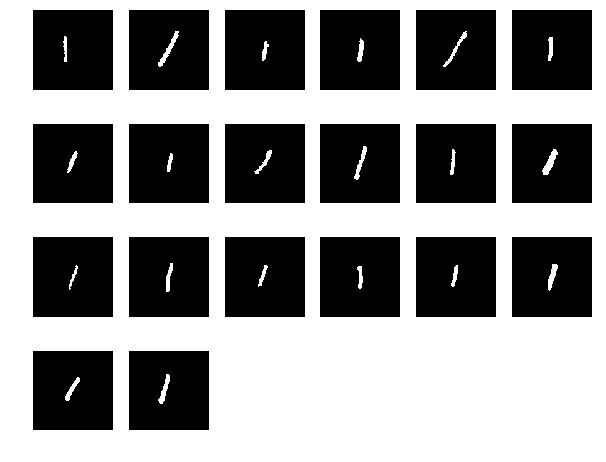

In [4]:
list_images = [];
for i in range(100,120):
    list_images.append(dataset['bitmaps'][i])

gridVisualize(list_images,6,(10,8),f_iden)

## Normalizaçaõ de imagens
    - Tamanho ....
    - Deslocação ....
    -
    -

## Extract contours

    - Extrai o contorno parametrico das imagens

In [5]:
numbins = 100
list_con = []
arr_x = np.arange(0,numbins)

for img in list_images:
    aContour = extractContours.extract_contours(img)
    c = fun(aContour[0],numbins) # problem type in aContour
    list_con.append(c)
    
array_con = np.array(list_con)

## Mean and Standard deviation 

    - Calcula a média aritmética para os eixos X e Y do contorno parametrico
    - Calcula a desvio padrão para os eixos X e Y do contorno parametrico

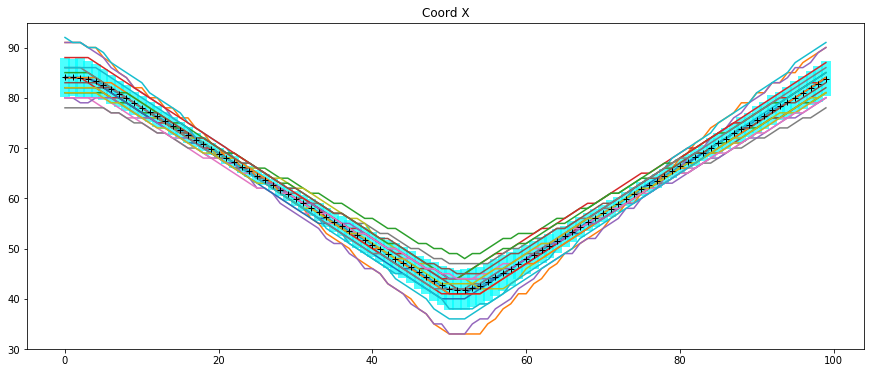

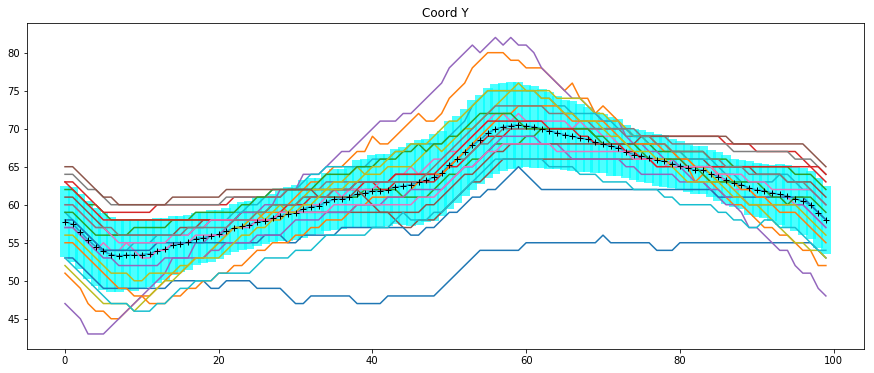

In [6]:
mm = np.mean(array_con,axis=0)
std = np.std(array_con,axis=0)

plt.rcParams["figure.figsize"] = [15,6]
for idx,title in zip([1,2],["Coord X","Coord Y"]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for contour in array_con:
        ax.plot(arr_x, contour[:,idx])
    ax.plot(arr_x, mm[:,idx],'+', color="black")
    plt.title(title)
    plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
    plt.show()

219


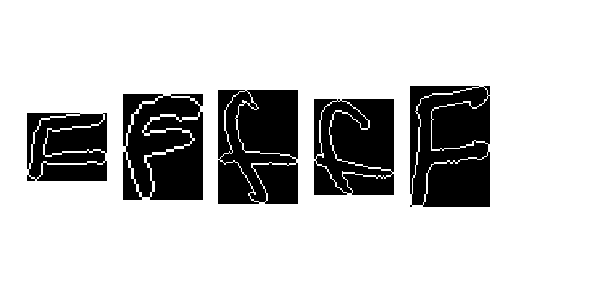

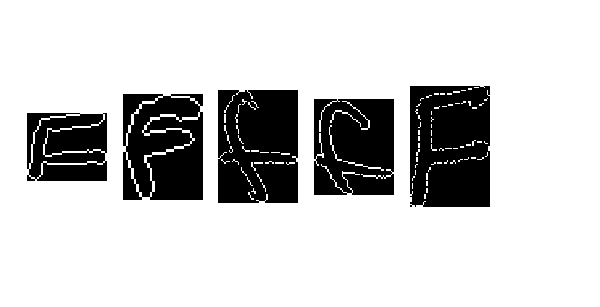

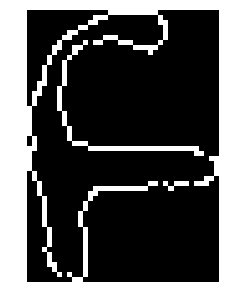

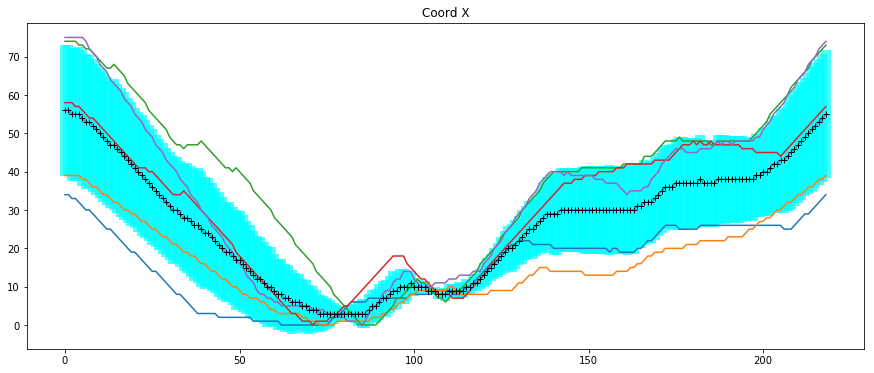

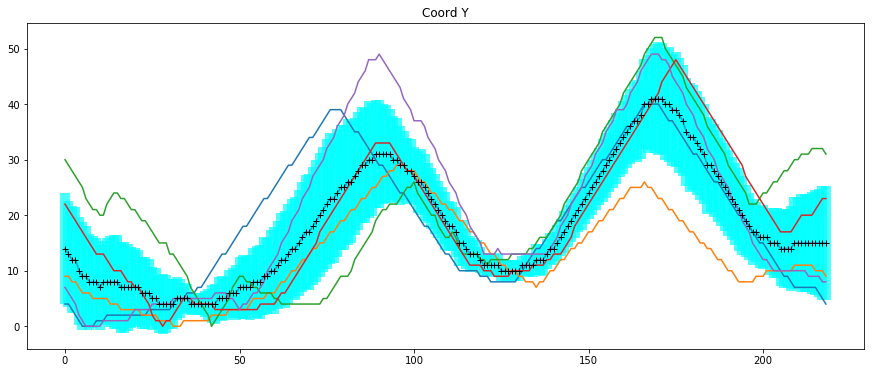

In [9]:
from sarpy import plotContour
"""
Função principal 
"""

def process (list_images):
#     gridVisualize(list_images,6,(10,5),plotContour.contour2bm)
    ##
    sum_peri = 0
    list_con = []
    for img in list_images:
        aContour = extractContours.extract_contours(img)
        sum_peri = sum_peri + len(aContour[0])
        list_con.append(aContour[0])
               
    numbins = int(sum_peri/len(list_con))
    print(numbins)
    arr_x = np.arange(0,numbins)
    array_con = np.asarray(list_con)
    array_cont_ini = array_con.copy
    gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    ##
    for i in range(0,len(array_con)):        
        c = fun(array_con[i],numbins) # problem type in aContour        
        c = c - np.min(c,axis=0)
        array_con[i] = np.array(c)
    ##
    gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    mm = np.mean(array_con,axis=0)
    std = np.std(array_con,axis=0)
    ##
    mm_n = mm - np.min(mm,axis=0)
    size = np.max(mm_n,axis=0)
    img_mm = np.zeros((int(size[1])+1,int(size[2])+1))
    for b in mm_n:
        img_mm[int(b[1])][int(b[2])] = 1
    plt.imshow(img_mm,cmap='gray')
    plt.axis('off')
    plt.show()
    ##
    plt.rcParams["figure.figsize"] = [15,6]
    for idx,title in zip([1,2],["Coord X","Coord Y"]):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for contour in array_con:
            ax.plot(arr_x, contour[:,idx])        
        ax.plot(arr_x, mm[:,idx],'+', color="black")
        plt.title(title)
        plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
        plt.show()
    
"""
###
# Example para imagens aleatórias 
#
"""    
# for c in range(0,62,10):
for c in range(15,16):
    list_images = [];
    for i in range(c*100,c*100+5):
        list_images.append(dataset['bitmaps'][i])
    process(list_images)